In [405]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
import seaborn as sns
import math
import statistics
import plotly.express as exp

In [406]:
data = pd.read_csv('Corrupted1_20_large.csv')
data

,Unnamed: 0,Mystery_Data_X,Mystery_Data_Y,Modified,Model,CHECKING
0,0,147.598288,943.983556,True,True,True
1,1,126.883240,924.435077,True,True,True
2,2,153.892770,134.277890,False,False,True
3,3,136.979872,101.434720,False,False,True
4,4,125.098692,142.390240,False,False,True
...,...,...,...,...,...,...
74995,74995,172.184696,179.618376,False,False,True
74996,74996,161.188845,170.210093,False,False,True
74997,74997,212.352493,165.790454,False,False,True
74998,74998,204.639874,189.994930,False,False,True


In [407]:
data = data.drop('Unnamed: 0',axis=1)
data

,Mystery_Data_X,Mystery_Data_Y,Modified,Model,CHECKING
0,147.598288,943.983556,True,True,True
1,126.883240,924.435077,True,True,True
2,153.892770,134.277890,False,False,True
3,136.979872,101.434720,False,False,True
4,125.098692,142.390240,False,False,True
...,...,...,...,...,...
74995,172.184696,179.618376,False,False,True
74996,161.188845,170.210093,False,False,True
74997,212.352493,165.790454,False,False,True
74998,204.639874,189.994930,False,False,True


In [408]:
data=data.fillna(0)

In [409]:
data1=data[['Mystery_Data_X','Mystery_Data_Y']].copy()
data1

,Mystery_Data_X,Mystery_Data_Y
0,147.598288,943.983556
1,126.883240,924.435077
2,153.892770,134.277890
3,136.979872,101.434720
4,125.098692,142.390240
...,...,...
74995,172.184696,179.618376
74996,161.188845,170.210093
74997,212.352493,165.790454
74998,204.639874,189.994930


In [410]:
ssd = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data1)
    ssd.append(km.inertia_) 

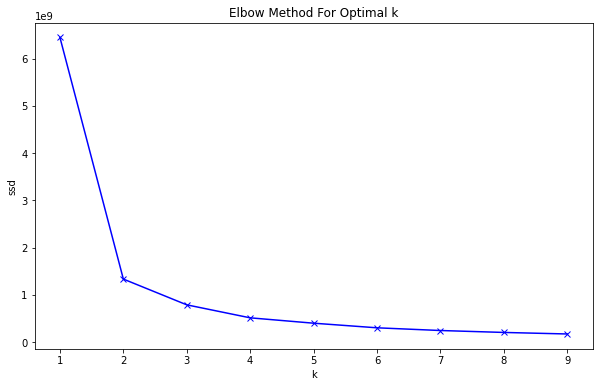

In [411]:
plt.figure(figsize=(10,6))
plt.plot(K, ssd, 'bx-')
plt.xlabel('k')
plt.ylabel('ssd')
plt.title('Elbow Method For Optimal k')
plt.show()

In [412]:
km = KMeans(n_clusters = 4)
clusters=km.fit(data1)

In [413]:
clusters

KMeans(n_clusters=4)

In [414]:
exp.scatter(data_frame= data1,x = 'Mystery_Data_X',y = 'Mystery_Data_Y',color=km.labels_)

In [415]:
def distance_from_center(income, house_value, label):
    '''
    Calculate the Euclidean distance between a data point and the center of its cluster.
:param float income: the standardized income of the data point 
    :param float age: the standardized age of the data point 
    :param int label: the label of the cluster
    :rtype: float
    :return: The resulting Euclidean distance  
    '''
    center_income =  clusters.cluster_centers_[label,0]
    center_house_value =  clusters.cluster_centers_[label,1]
    distance = np.sqrt((income - center_income) ** 2 + (house_value - center_house_value) ** 2)
    return np.round(distance, 3)

In [416]:
data1['label'] = clusters.labels_
data1['distance'] = distance_from_center(data1.Mystery_Data_X, data1.Mystery_Data_X, data1.label)

In [417]:
data1

,Mystery_Data_X,Mystery_Data_Y,label,distance
0,147.598288,943.983556,1,824.044
1,126.883240,924.435077,1,844.856
2,153.892770,134.277890,0,16.800
3,136.979872,101.434720,0,7.733
4,125.098692,142.390240,0,24.244
...,...,...,...,...
74995,172.184696,179.618376,0,42.552
74996,161.188845,170.210093,0,27.045
74997,212.352493,165.790454,0,99.316
74998,204.639874,189.994930,0,88.412


In [418]:
percentile = 70
# getting outliers whose distances are greater than some percentile
outliers_idx = data1.index[np.where(data1.distance > np.percentile(data1.distance, percentile))]

In [419]:
outliers_idx

Int64Index([    0,     1,     8,    13,    18,    19,    23,    25,    26,
               36,
            ...
            74977, 74978, 74981, 74984, 74985, 74989, 74993, 74997, 74998,
            74999],
           dtype='int64', length=22499)

In [420]:
outliers_idx

Int64Index([    0,     1,     8,    13,    18,    19,    23,    25,    26,
               36,
            ...
            74977, 74978, 74981, 74984, 74985, 74989, 74993, 74997, 74998,
            74999],
           dtype='int64', length=22499)

# WITH ZERO

In [421]:
outlier_idx = data1.index[data.Mystery_Data_Y==0]

In [422]:
outlier_idx

Int64Index([   39,    46,    61,    78,   104,   125,   129,   149,   165,
              205,
            ...
            74796, 74812, 74822, 74836, 74839, 74855, 74866, 74906, 74951,
            74986],
           dtype='int64', length=3885)

In [423]:
outliers = outlier_idx.union(outliers_idx)

In [424]:
outliers

Int64Index([    0,     1,     8,    13,    18,    19,    23,    25,    26,
               36,
            ...
            74978, 74981, 74984, 74985, 74986, 74989, 74993, 74997, 74998,
            74999],
           dtype='int64', length=25777)

In [425]:
arr = data.index.isin(outliers)

In [426]:
arr

array([ True,  True, False, ...,  True,  True,  True])

In [427]:
df = pd.DataFrame(arr)

In [428]:
df

,0
0,True
1,True
2,False
3,False
4,False
...,...
74995,False
74996,False
74997,True
74998,True


In [429]:
df.to_csv('check.csv')

In [430]:
import pandas as pd

In [432]:
read = pd.read_csv('Corrupted1_20_large_KMeans.csv')
read

,Unnamed: 0,Mystery_Data_X,Mystery_Data_Y,Modified,Model,CHECKING
0,0,147.598288,943.983556,True,True,True
1,1,126.883240,924.435077,True,True,True
2,2,153.892770,134.277890,False,False,True
3,3,136.979872,101.434720,False,False,True
4,4,125.098692,142.390240,False,False,True
...,...,...,...,...,...,...
74995,74995,172.184696,179.618376,False,False,True
74996,74996,161.188845,170.210093,False,False,True
74997,74997,212.352493,165.790454,False,True,False
74998,74998,204.639874,189.994930,False,True,False


In [433]:
l = len(read['CHECKING'])
l

75000

In [434]:
count = 0

In [435]:
for i in range(0,l):
  if(read['CHECKING'][i] == True):
    count = count + 1;

In [436]:
count

65405

In [437]:
accuracy = count/l

In [438]:
accuracy

0.8720666666666667

In [439]:
count1 = 0
count2 = 0

In [440]:
for i in range(0,l):
  if(read['Modified'][i] == True):
    count2 = count2 + 1
    if(read['Model'][i] == True):
      count1 = count1 + 1

In [441]:
count1

16844

In [442]:
count2

17506

In [443]:
acc = count1/count2

In [444]:
acc

0.9621843939220839

In [445]:
count6 = 0
count5 = 0
for i in range(0,l):
  if(read['Model'][i] == True):
      count6 = count6 + 1
for i in range(0,l):
  if(read['Modified'][i] == True):
    if(read['Model'][i] == True):
      count5 = count5 + 1 
precision = count5/count6
precision  

0.6534507506692012

In [446]:
count7 = 0
count8 = 0
for i in range(0,l):
  if(read['Modified'][i] == False):
    count8 = count8 + 1
    if(read['Model'][i] == False):
      count7 = count7 + 1
sensitivity = count7/count8    
sensitivity 

0.8446272654537865

In [447]:
f1_score = 2*acc*precision/(acc+precision)
f1_score

0.7783194325716793